<a href="https://colab.research.google.com/github/the-Jabberwocky/The_Debuggers_Project/blob/main/I310D_Data_Science_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Evaluating The Relationship Between Lifestyle Practices and Sleep Quality**

**Group**: The Debuggers

**Names**: Harini Chandrasekhar, Serena Manwani, Taryn Morris, Mona Brown

**Course**: I310D - Introduction to Human-Centered Data Science Project

###**Imported Libraries and File Read In**

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Read in csv file
sleep_quality_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sleep_quality_df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### **Data Cleaning and Preprocessing**

#### **Initial Cleaning and Statistics**

In [ ]:
# Adjust the Blood Pressure Column by splitting the values by the slash into systolic and diastolic
sleep_quality_df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = sleep_quality_df['Blood Pressure'].str.split('/', expand=True)
sleep_quality_df['Systolic Blood Pressure'] = pd.to_numeric(sleep_quality_df['Systolic Blood Pressure'], errors='coerce')
sleep_quality_df['Diastolic Blood Pressure'] = pd.to_numeric(sleep_quality_df['Diastolic Blood Pressure'], errors='coerce')
# Drop the original blood pressure column
#sleep_quality_df.drop(columns=['Blood Pressure'], inplace=True)

# Drop any null values in the dataframe and update the dataframe
sleep_quality_df.dropna(inplace=True)

# Present statistics on the dataset
sleep_quality_df.info()

# Present descriptive statistics on the dataset
sleep_quality_df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Person ID                 155 non-null    int64  
 1   Gender                    155 non-null    object 
 2   Age                       155 non-null    int64  
 3   Occupation                155 non-null    object 
 4   Sleep Duration            155 non-null    float64
 5   Quality of Sleep          155 non-null    int64  
 6   Physical Activity Level   155 non-null    int64  
 7   Stress Level              155 non-null    int64  
 8   BMI Category              155 non-null    object 
 9   Blood Pressure            155 non-null    object 
 10  Heart Rate                155 non-null    int64  
 11  Daily Steps               155 non-null    int64  
 12  Sleep Disorder            155 non-null    object 
 13  Systolic Blood Pressure   155 non-null    int64  
 14  Diastolic Blood

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,244.761290,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452,134.922581,89.806452
std,91.282997,7.839311,0.773534,1.337325,20.634158,1.946757,5.187381,1893.921881,5.396651,4.868527
min,4.000000,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,199.500000,43.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000,130.000000,85.000000
50%,255.000000,45.000000,6.500000,7.000000,45.000000,7.000000,72.000000,6000.000000,135.000000,90.000000
75%,304.500000,51.000000,7.400000,8.000000,75.000000,7.000000,75.000000,7000.000000,140.000000,95.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


#### **Exploratory Analysis Visualizations - Categorical Variables**

#####**Gender Variable Visualization**

3        Male
4        Male
5        Male
6        Male
16     Female
        ...  
369    Female
370    Female
371    Female
372    Female
373    Female
Name: Gender, Length: 155, dtype: object

<BarContainer object of 2 artists>

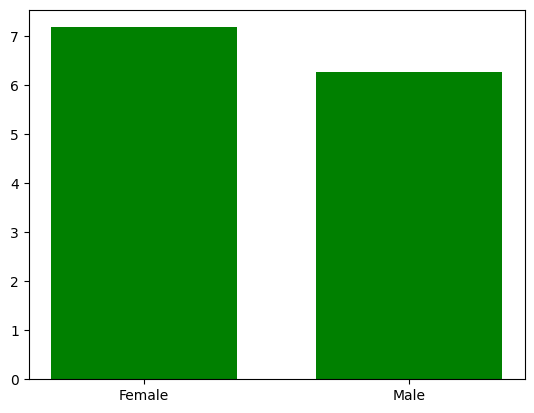

In [ ]:
#Visualizations for Categorical Variable Gender
gender_column = sleep_quality_df["Gender"]
sleep_quality_column = sleep_quality_df["Quality of Sleep"]

average_sleep_quality_gender = sleep_quality_df.groupby("Gender")["Quality of Sleep"].mean()
indices = average_sleep_quality_gender.index.tolist()
avg_sleep_data = average_sleep_quality_gender.to_list()
display(gender_column)

# Now plot our bar graph
plt.bar(indices, avg_sleep_data, color ='green', width = 0.7)


#####**Occupation Variable Visualization**

3        Male
4        Male
5        Male
6        Male
16     Female
        ...  
369    Female
370    Female
371    Female
372    Female
373    Female
Name: Gender, Length: 155, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Accountant'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Lawyer'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Sales Representative'),
  Text(6, 0, 'Salesperson'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Software Engineer'),
  Text(9, 0, 'Teacher')])

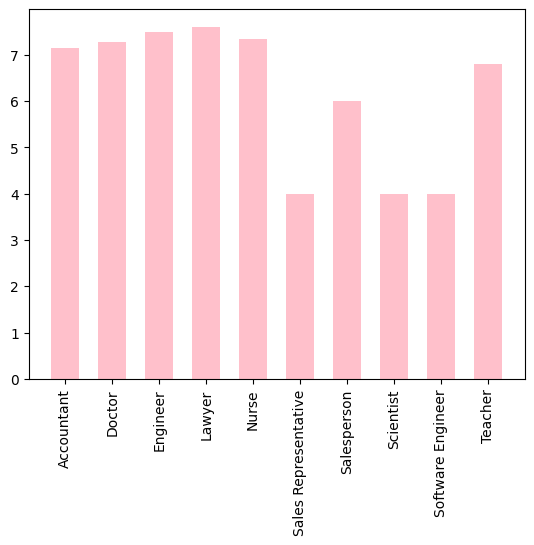

In [ ]:
#Visualizations for Categorical Variable Occupation
occupation_column = sleep_quality_df["Occupation"]
sleep_quality_column = sleep_quality_df["Quality of Sleep"]

average_sleep_quality_occupation = sleep_quality_df.groupby("Occupation")["Quality of Sleep"].mean()
indices = average_sleep_quality_occupation.index.tolist()
avg_sleep_data = average_sleep_quality_occupation.to_list()
display(gender_column)

# Now plot our bar graph
plt.bar(indices, avg_sleep_data, color ='pink', width = 0.6)
# Rotating X-axis labels
plt.xticks(rotation = 90)

#####**BMI Type Variable Visualization**

3              Obese
4              Obese
5              Obese
6              Obese
16     Normal Weight
           ...      
369       Overweight
370       Overweight
371       Overweight
372       Overweight
373       Overweight
Name: BMI Category, Length: 155, dtype: object

([0, 1, 2, 3],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Normal Weight'),
  Text(2, 0, 'Obese'),
  Text(3, 0, 'Overweight')])

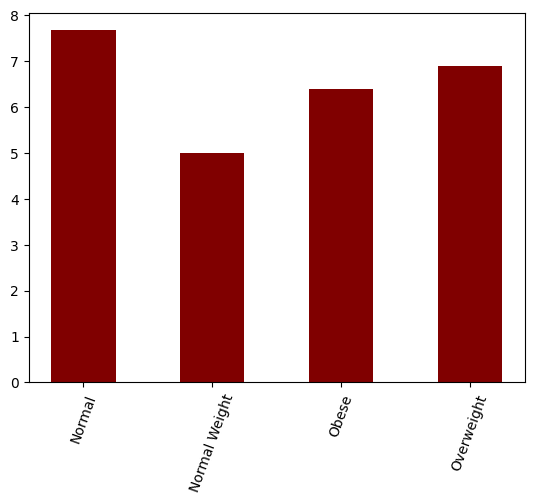

In [ ]:
#Visualizations for Categorical Variable BMI
BMI_column = sleep_quality_df["BMI Category"]
sleep_quality_column = sleep_quality_df["Quality of Sleep"]

average_sleep_quality_bmi = sleep_quality_df.groupby("BMI Category")["Quality of Sleep"].mean()
indices = average_sleep_quality_bmi.index.tolist()
avg_sleep_data = average_sleep_quality_bmi.to_list()
display(BMI_column)

# Now plot our bar graph
plt.bar(indices, avg_sleep_data, color ='maroon', width = 0.5)
# Rotating X-axis labels
plt.xticks(rotation = 70)

#####**Sleep Disorder Variable Visualization**

3      Sleep Apnea
4      Sleep Apnea
5         Insomnia
6         Insomnia
16     Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 155, dtype: object

([0, 1], [Text(0, 0, 'Insomnia'), Text(1, 0, 'Sleep Apnea')])

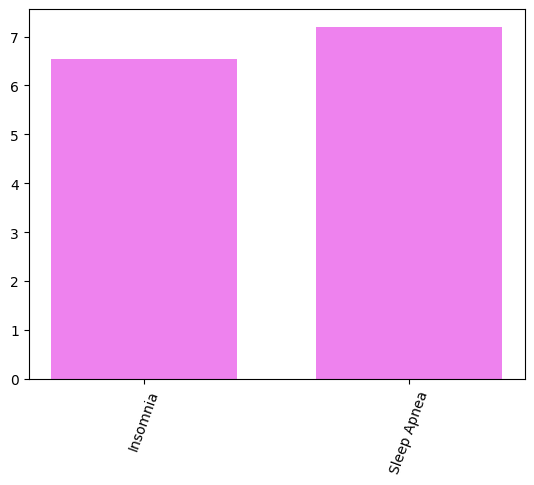

In [ ]:
#Visualizations for Categorical Variable Sleep Disorder

sleep_disorder_column = sleep_quality_df["Sleep Disorder"]
sleep_quality_column = sleep_quality_df["Quality of Sleep"]
average_sleep_quality_disorder = sleep_quality_df.groupby("Sleep Disorder")["Quality of Sleep"].mean()
indices = average_sleep_quality_disorder.index.tolist()
avg_sleep_data = average_sleep_quality_disorder.to_list()
display(sleep_disorder_column)

# Now plot our bar graph
plt.bar(indices, avg_sleep_data, color ='violet', width = 0.7)
# Rotating X-axis labels
plt.xticks(rotation = 70)

#### **Exploratory Analysis Visualizations - Continous Variables**

<Axes: >

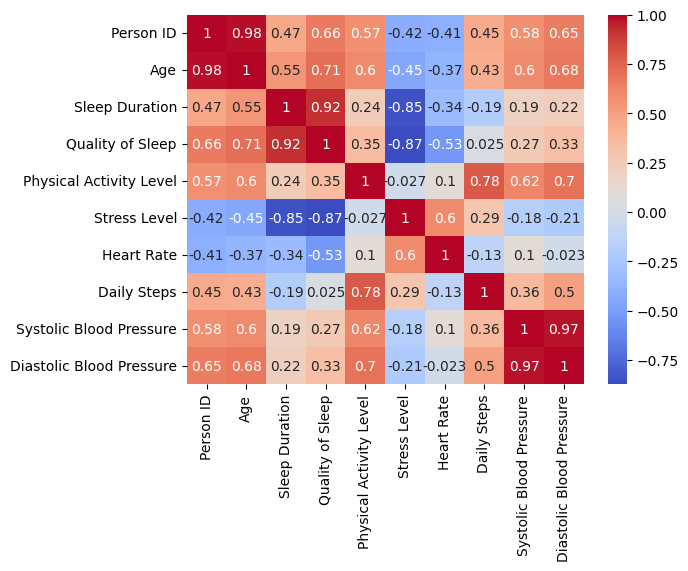

In [ ]:
#Correlation Matrix for Continuous Variables
sleep_quality_df

#Creating a correlation matrix of the attributes and understanding the strength of the relationship between variables
numeric_sleep_quality_df = sleep_quality_df.select_dtypes(include=['number'])
correlation_matrix = numeric_sleep_quality_df.corr()
#Presenting correlation in a heat map to visualize the strongest relationships
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#### **One-Hot Encoding Significant Categorical Variable**

##### **Occupation Variable Encoding**

In [ ]:
#Use one hot encoding on the categorical attributes to make them numerical : https://www.geeksforgeeks.org/ml-one-hot-encoding/
occupation_encoder = OneHotEncoder()
# Build vocabulary to use encoder on 'Occupation' column
occupation_encoder.fit(sleep_quality_df[["Occupation"]])
# Print the occupation vocabulary by each unique name
display("Printing Occupation Vocabulary (Unique Occupations):", occupation_encoder.get_feature_names_out(input_features=['Occupation']))
# Encode the occupation variable by assigning the numeric 1s and 0s
occupation_encoded = occupation_encoder.transform(sleep_quality_df[["Occupation"]])
#Assign respective names to encoded occupation
encoded_feature_names = occupation_encoder.get_feature_names_out(input_features=['Occupation'])
# Create DataFrame of encoded 'Occupation'
occupation_encoded_df = pd.DataFrame(occupation_encoded.toarray(), columns=encoded_feature_names)
# Drop the original 'Occupation' column
sleep_quality_df.drop(columns=["Occupation"], inplace=True)
sleep_quality_df.reset_index(drop = True, inplace=True)
occupation_encoded_df.reset_index(drop = True, inplace = True)
# Merge the new columns of the unique occupation variables to the original data frame
sleep_quality_df = pd.concat([sleep_quality_df, occupation_encoded_df], axis=1)
#Display dataframe
display(sleep_quality_df)


'Printing Occupation Vocabulary (Unique Occupations):'

array(['Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher'], dtype=object)

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,...,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,4,Male,28,5.9,4,30,8,Obese,140/90,85,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5,Male,28,5.9,4,30,8,Obese,140/90,85,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6,Male,28,5.9,4,30,8,Obese,140/90,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7,Male,29,6.3,6,40,7,Obese,140/90,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17,Female,29,6.5,5,40,7,Normal Weight,132/87,80,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,370,Female,59,8.1,9,75,3,Overweight,140/95,68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
151,371,Female,59,8.0,9,75,3,Overweight,140/95,68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,372,Female,59,8.1,9,75,3,Overweight,140/95,68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
153,373,Female,59,8.1,9,75,3,Overweight,140/95,68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **Organized Data with Required Columns**




In [ ]:
#Select desired columns and display
sleep_quality_df = sleep_quality_df[['Person ID', 'Age', 'Sleep Duration', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Software Engineer', 'Occupation_Teacher', 'Stress Level', 'Heart Rate', 'Quality of Sleep']]
display(sleep_quality_df)

,Person ID,Age,Sleep Duration,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Software Engineer,Occupation_Teacher,Stress Level,Heart Rate,Quality of Sleep
0,4,28,5.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,85,4
1,5,28,5.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,85,4
2,6,28,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,85,4
3,7,29,6.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7,82,6
4,17,29,6.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,370,59,8.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9
151,371,59,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9
152,372,59,8.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9
153,373,59,8.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9


### **Data Split: Training (80%) - Testing (20%)**

In [ ]:
#Split the dataset into training and testing (20% testing : 80% training)
train_sleep_quality_df, test_sleep_quality_df = train_test_split(sleep_quality_df, test_size = 0.2)
display(test_sleep_quality_df)
display(train_sleep_quality_df)

,Person ID,Age,Sleep Duration,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Software Engineer,Occupation_Teacher,Stress Level,Heart Rate,Quality of Sleep
2,6,28,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,85,4
48,224,44,6.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,72,6
28,189,43,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,65,7
67,243,44,6.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,72,6
130,348,57,8.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9
84,265,48,7.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,83,7
59,235,44,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,65,7
141,361,59,8.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9
43,219,43,7.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,70,8
4,17,29,6.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,80,5


,Person ID,Age,Sleep Duration,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Software Engineer,Occupation_Teacher,Stress Level,Heart Rate,Quality of Sleep
79,257,45,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,65,7
105,289,50,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,75,6
33,194,43,6.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,72,6
117,306,51,6.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,75,6
10,68,33,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,72,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,200,43,6.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,72,6
150,370,59,8.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68,9
118,307,52,6.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,72,7
70,246,44,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,65,7


### **Machine Learning Models: Training**


####**MLP Model Training**

In [ ]:
train_features = train_sleep_quality_df[['Age', 'Sleep Duration', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Software Engineer', 'Occupation_Teacher', 'Stress Level', 'Heart Rate']]

train_labels = train_sleep_quality_df["Quality of Sleep"]

train_features.head()
train_labels.head()

mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())




MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')